In [6]:
import numpy as np
import matplotlib.pyplot as plt

*N* - number of trajectory snapshots

*D* - dimension of a snapshot, in this case D = (4 atoms x 3 coordinates(x,y,z)) = 12

*data*: 
## Loading in  Data

**data** is an $N \times D$ array,  with $N = 100,000$ rows of data, $D = 12$ dimensions, of form
$$\text{data} = \left[
\begin{array}{ccc}
x_{0}^{(1)}  y_0^{(1)} z_0^{(1)} & x_0^{(2)} y_0^{(2)}  z_0^{(2)} & x_0^{(3)} y_0^{(3)}  z_0^{(3)} &  x_0^{(4)} y_0^{(4)}  z_0^{(4)} \\
\vdots & \vdots & \vdots & \vdots \\
x_{i}^{(1)}  y_i^{(1)} z_i^{(1)} & x_i^{(2)} y_i^{(2)}  z_i^{(2)} & x_i^{(3)} y_i^{(3)}  z_i^{(3)} &  x_i^{(4)} y_i^{(4)}  z_i^{(4)} \\  
\vdots & \vdots & \vdots & \vdots \\
x_{N-1}^{(1)}  y_{N-1}^{(1)} z_{N-1}^{(1)} & x_{N-1}^{(2)} y_{N-1}^{(2)}  z_{N-1}^{(2)} & x_{N-1}^{(3)} y_{N-1}^{(3)}  z_{N-1}^{(3)} &  x_{N-1}^{(4)} y_{N-1}^{(4)}  z_{N-1}^{(4)},   
\end{array}\right]$$

so that $[x_{i}^{(k)}  y_i^{(k)}  z_i^{(k)}] \in \mathbb{R}^3$ corresponds to the position of atom $k,$ for $k=1,2,3,4,$ at snapshot $i$.

------------------------------------------------------------------------------------------------------------------------------------------------

**dihedrals** is an $N \times 1$ array with $N = 100,000$ data points, with entry $i$ corresponding to the dihedral angle $\varphi(X_i)\in [-\pi, \pi]$ of snapshot $X_i = [x_{i}^{(1)}  y_i^{(1)} z_i^{(1)}  x_i^{(2)} y_i^{(2)}  z_i^{(2)}  x_i^{(3)} y_i^{(3)}  z_i^{(3)}   x_i^{(4)} y_i^{(4)}  z_i^{(4)}]^{\top}$

$$\text{dihedrals} = [\varphi(X_0) \ \varphi(X_1) \cdots \varphi(X_{N-1})]^{\top}$$

------------------------------------------------------------------------------------------------------------------------------------------------


**potentials** is an $N \times 1$ array with $N = 100,000$ data points, with entry $i$ corresponding to the potential energy of snapshot $X_i$
$$\text{potentials} = [V(X_0) \ V(X_1) \cdots V(X_{N-1})]^{\top}$$



------------------------------------------------------------------------------------------------------------------------------------------------

The original molecular dynamics simulation was done in OpenMM, simulation set up with:

temperature $T = 300$ Kelvin (K) [this is usually used as `room temperature']

timestep $\Delta t = 2$ femtoseconds (fs)  [1 fs = 1 x 10^-15 seconds]


simulation length T = **(1 x 10^7 steps) x (2 fs)** = 2 x 10^7 fs = 2 x 10^4 picoseconds (ps)
= **20 nanoseconds (ns)**

 [1 ps = 1000 fs = 1 x 10^-12 seconds ]

 [1 ns = 1000 ps = 1 x 10^-9 seconds ]

------------------------------------------------------------------------------------------------------------------------------------------------
**data**, **dihedrals**, **potentials** are subsampled every 100 steps from the original simulation, for $N =10^5$ data points at timestep $0.2$ ps


In [7]:
fname = "../output/butane_current.npz"
inData = np.load(fname)
print("Keys in data:")
print(list(inData.keys()))

data = inData["data"]
print("Data shape from trajectory:")
print(data.shape)
dihedrals = inData["dihedrals"]
potential = inData["potential"]
kbT = inData["kbT"]

Keys in data:
['data', 'dihedrals', 'potential', 'kbT']
Data shape from trajectory:
(100000, 12)


### Dihedral: Probability Distribution and time-series plot

Text(0, 0.5, 'Dihedral Angle')

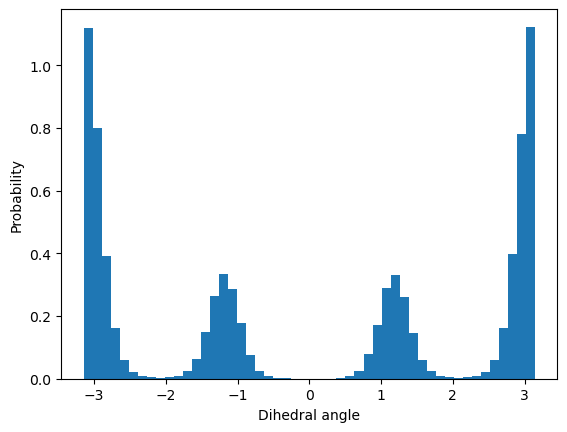

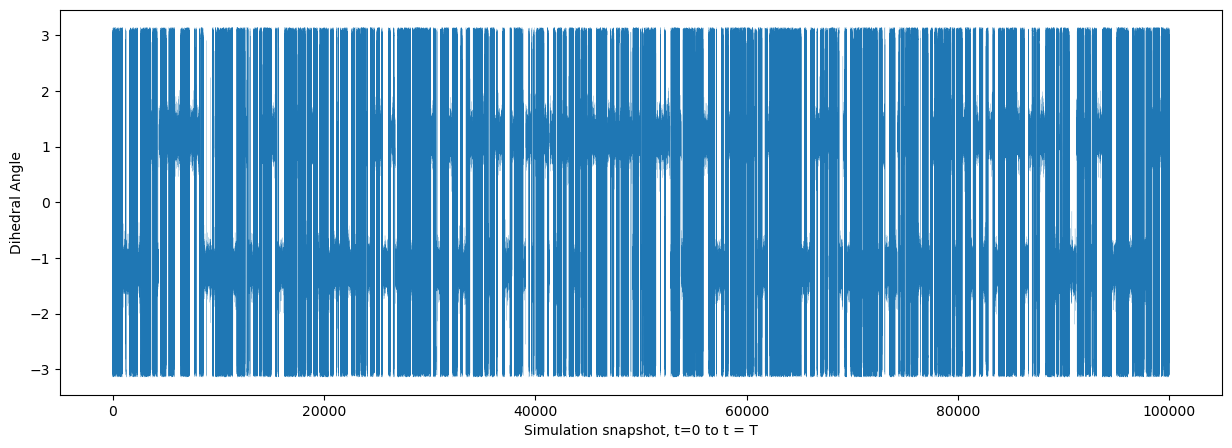

In [8]:
counts, bins, _ = plt.hist(dihedrals, bins=50, density=True)
plt.xlabel("Dihedral angle")
plt.ylabel("Probability")

plt.figure(figsize=(15,5))
plt.plot(dihedrals, linewidth=0.1)
plt.xlabel("Simulation snapshot, t=0 to t = T")
plt.ylabel("Dihedral Angle")


### Re-visualizing by shifting $[-\pi, 0]$ to $[\pi, 2\pi]$

Text(0, 0.5, 'Shifted Dihedral Angle')

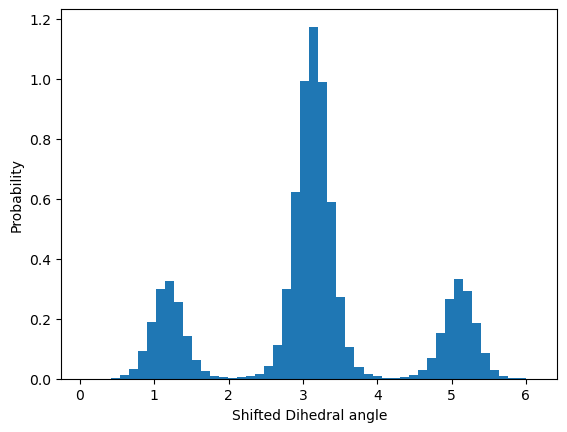

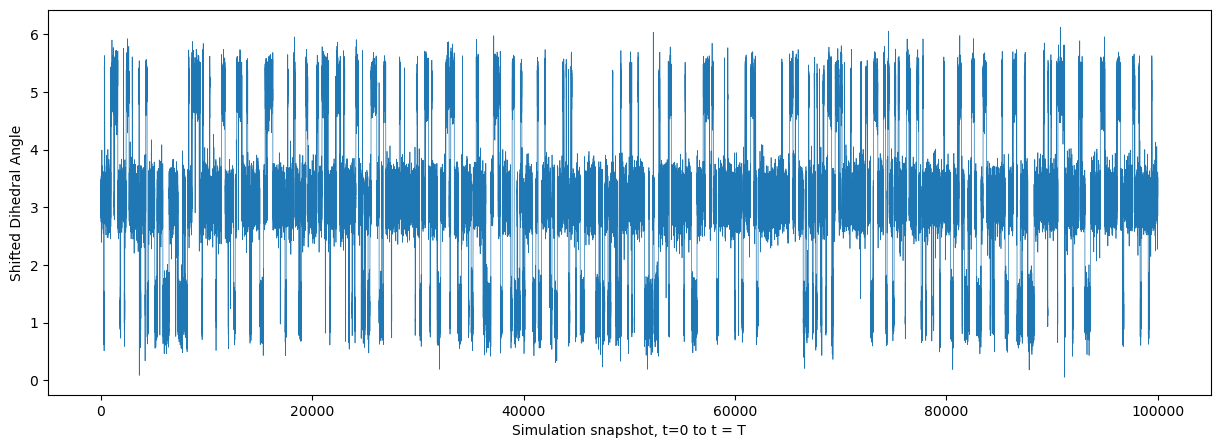

In [9]:
dihedrals_shift = dihedrals.copy()
dihedrals_shift[dihedrals < 0] = dihedrals_shift[dihedrals < 0] + 2*np.pi 
plt.figure()
counts, bins, _ = plt.hist(dihedrals_shift, bins=50, density=True)
plt.xlabel("Shifted Dihedral angle")
plt.ylabel("Probability")


plt.figure(figsize=(15,5))
plt.plot(dihedrals_shift, linewidth=0.5)
plt.xlabel("Simulation snapshot, t=0 to t = T")
plt.ylabel("Shifted Dihedral Angle")

### Potential Energy $V(x)$ and Gibbs density $\rho(x) \propto e^{-\beta V(x)} = e^{-V(x)/\text{kbT}} $

Plots v. Dihedral angle, and simulation plots show a lot of noise in the high-dim. position spaces of simulation $\{X_i\}_{i=0}^{N-1}$

(0.0, 1e-07)

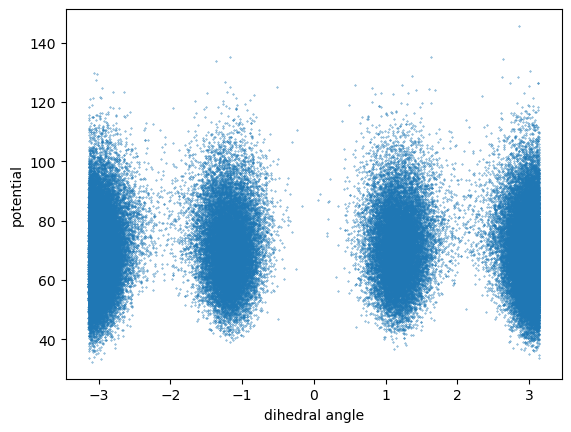

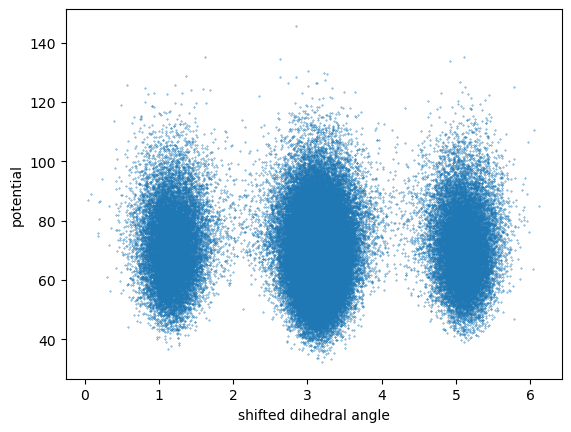

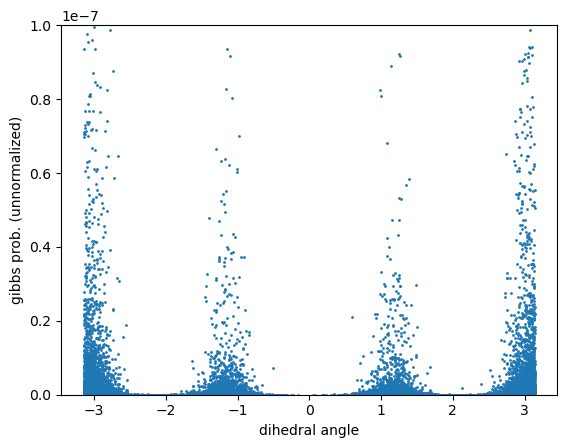

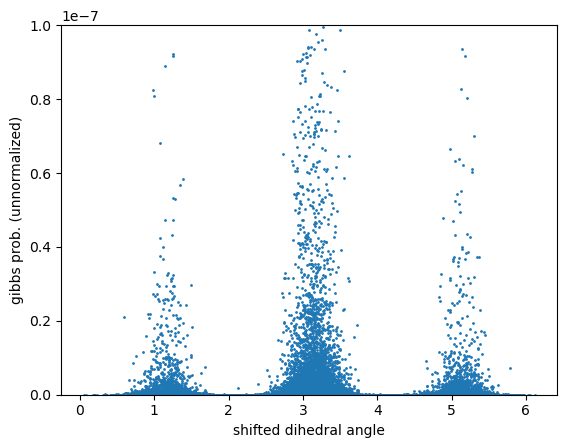

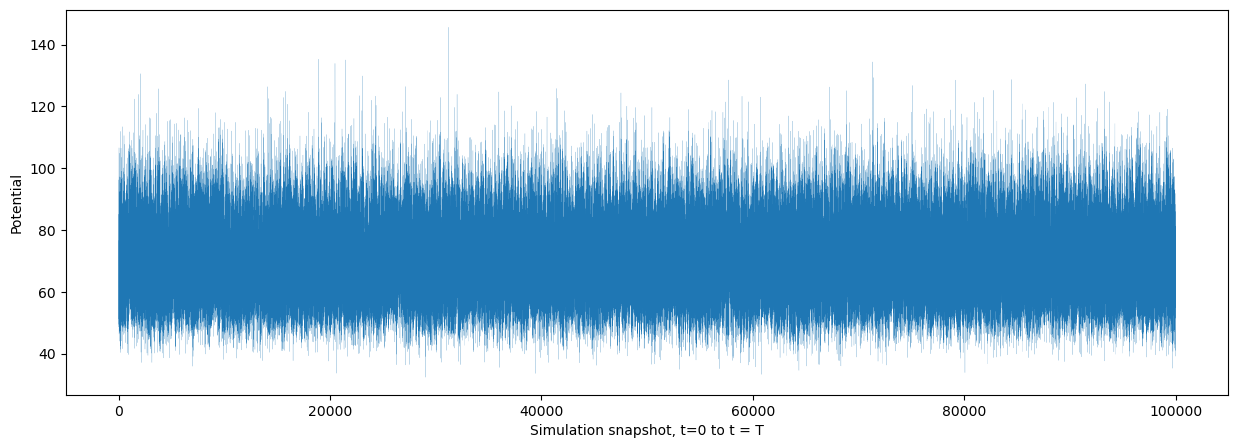

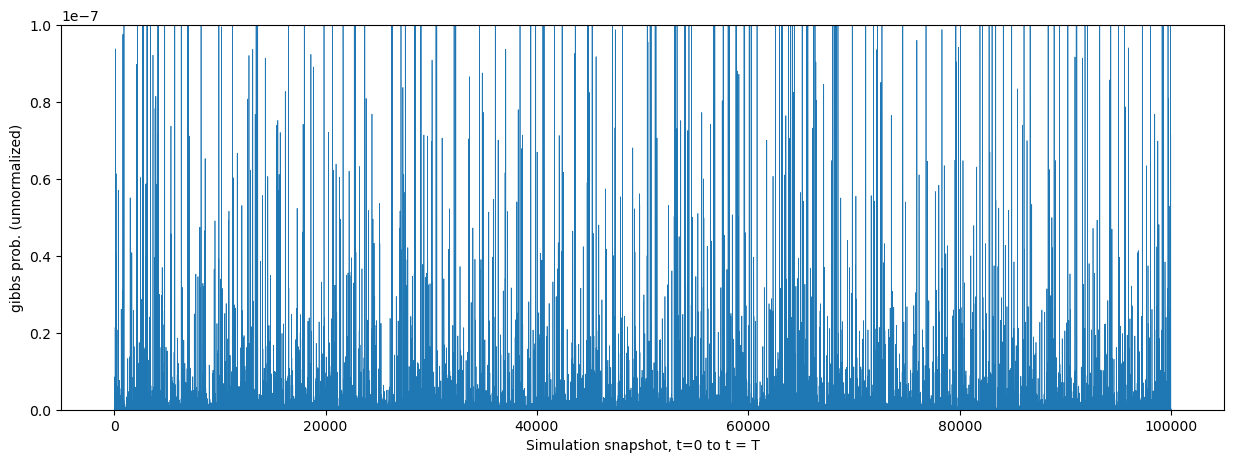

In [10]:
gibbs_unnormalized = np.exp(-potential/(kbT))

# Scatter of potential
plt.scatter(dihedrals, potential, s=0.1)
plt.xlabel("dihedral angle")
plt.ylabel("potential")

plt.figure()
plt.scatter(dihedrals_shift, potential, s=0.1)
plt.xlabel("shifted dihedral angle")
plt.ylabel("potential")

plt.figure()
plt.scatter(dihedrals, gibbs_unnormalized, s=1.0)
plt.xlabel("dihedral angle")
plt.ylabel("gibbs prob. (unnormalized)")
plt.ylim([0, 1E-7])

plt.figure()
plt.scatter(dihedrals_shift, gibbs_unnormalized, s=1.0)
plt.xlabel("shifted dihedral angle")
plt.ylabel("gibbs prob. (unnormalized)")
plt.ylim([0, 1E-7])


plt.figure(figsize=(15,5))
plt.plot(potential, linewidth=0.1)
plt.xlabel("Simulation snapshot, t=0 to t = T")
plt.ylabel("Potential")

plt.figure(figsize=(15,5))
plt.plot(gibbs_unnormalized, linewidth=0.5)
plt.xlabel("Simulation snapshot, t=0 to t = T")
plt.ylabel("gibbs prob. (unnormalized)")
plt.ylim([0, 1E-7])
